In [1239]:
# import the required libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows',120)
pd.options.display.float_format = '{:.2f}'.format

## 1. Reading the input data from file

In [1349]:
file_location = "data/loan.csv"
loan_data_raw = pd.read_csv(file_location)
loan_data_raw.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0    24000.00            Verified  Dec-11   Fully Paid          n   
1    30000.00     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   
1    309xx         GA  1.00            0           Apr-99               5   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         3        0   
1                     NaN                     NaN         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   
1       1687      9.40%          4                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00      5863.16          5833.84          5000.00   
1           0.00      1008.71          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                        0.00                          NaN            1   
1                        0.00                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0               0           NaN          NaN          NaN         NaN   
1               0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          NaN           NaN                   NaN          NaN   
1          NaN           NaN                   NaN          NaN   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             NaN      NaN                      0.00            0   
1             NaN      NaN                      0.00            0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0    

## 2. Understanding the structure of data

In [1241]:
# Getting the dataframe shape
loan_data_raw.shape

(39717, 111)

In [1242]:
# Getting the column information
loan_data_raw.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [1243]:
# Basic info of the dataframe
loan_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1244]:
# Statistical details of the dataframe
loan_data_raw.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
count                14035.00                 2786.00  39717.00 39717.00   
mean                    35.90                   69.70      9.29     0.06   
std                     22.02                   43.82      4.40     0.24   
min                      0.00                    0.00      2.00     0.00   
25%                     18.00                   22.00      6.00     0.00   
50%                     34.00                   90.00      9.00     0.00   
75%                     52.00                  104.00     12.00     0.00   
max                    120.00                  129.00     44.00     4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count   39717.00   39717.00   39717.00       39717.00     39717.00   
mean    13382.53      22.09      51.23          50.99     12153.60   
std     15885.02      11.40     375.17         373.82      9042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%      3703.00      13.00       0.00           0.00      5576.93   
50%      8850.00      20.00       0.00           0.00      9899.64   
75%     17058.00      29.00       0.00           0.00     16534.43   
max    149588.00      90.00    6311.47        6307.37     58563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count         39717.00         39717.00       39717.00            39717.00   
mean          11567.15          9793.35        2263.66                1.36   
std            8942.67          7065.52        2608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%            5112.31          4600.00         662.18                0.00   
50%            9287.15          8000.00        1348.91                0.00   
75%           15798.81         13653.26        2833.40                0.00   
max           58563.68         35000.02       23563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count    39717.00                 39717.00         39717.00   
mean        95.22                    12.41          2678.83   
std        688.74                   148.67          4447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00          3293.16   
max      29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
count                    39661.00                 

In [1245]:
# there are a lot of columns which are single valued
# It is safe to remove those columns since they do not contribute to any differentiation among the rows in the dataset

constant_columns = []

for column in loan_data_raw.columns:
    if loan_data_raw[column].notnull().all():
        if len(loan_data_raw[column].unique()) == 1:
            constant_columns.append(column)
                
print("Columns which are single valued are\n", ",\n ".join(map(str, constant_columns)))

Columns which are single valued are
 pymnt_plan,
 initial_list_status,
 policy_code,
 application_type,
 acc_now_delinq,
 delinq_amnt


In [1246]:
# Check what all columns have all the null values

columns_with_all_null = loan_data_raw.columns[loan_data_raw.isnull().all()]
print(columns_with_all_null)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

#### There are columns which don't correspond to the scenario whether a loan will default or not before the approval
the columns that are not related to loan defaulting
id, 
member_id, 
url, 
title, 
emp_title, 
zip_code, 
last_credit_pull_d

desc - this column has text data and has high percentage of null values as well 

out_prncp_inv, total_pymnt_inv - these are also not related as they correspond to investor funds

revol_bal and revol_util have very high cardinality

earliest_cr_line has high cardinality

In [1247]:
excluded_columns = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc", 
                          "out_prncp_inv", "total_pymnt_inv","out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int",
                          "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",
                          "grade", "sub_grade", "emp_length", "verification_status",
                          "chargeoff_within_12_mths", "delinq_2yrs", "installment", "earliest_cr_line", "inq_last_6mths",
                          "pub_rec", "open_acc", "total_acc", "revol_util", "revol_bal", "collections_12_mths_ex_med", "tax_liens"               
                         ]

### Columns which are associated to after the loan is processed and disbursed to the borrower
out_prncp
total_pymnt
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
chargeoff_within_12_mths


## 3. Data Quality Check and missing values

In [1248]:
### 3.1.1 Removing records with `Current` as loan_status

# The reason for doing so is because Current loan status won't provide much insight
# during the EDA because the final outcome is yet not known. So we can drop it.

loan_data_raw = loan_data_raw[loan_data_raw.loan_status != "Current"]
loan_data_raw.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### 3.1.1 Dropping Columns which are all null

In [1249]:
print("Before removing the all null columns")
print(loan_data_raw.shape)
loan_data_raw.dropna(axis=1, how="all", inplace=True)
print("After removing the all null columns")
print(loan_data_raw.shape)

Before removing the all null columns
(38577, 111)
After removing the all null columns
(38577, 56)


### 3.1.2 Dropping columns which are single valued

In [1250]:
print("Before removing the constant columns")
print(loan_data_raw.shape)
loan_data_raw.drop(columns=constant_columns, inplace=True)
print("After removing the constant columns")
print(loan_data_raw.shape)

Before removing the constant columns
(38577, 56)
After removing the constant columns
(38577, 50)


### 3.1.3 Dropping columns which are excluded 

In [1251]:
print("Before removing the excluded columns")
print(loan_data_raw.shape)
loan_data_raw.drop(columns=excluded_columns, inplace=True)
print("After removing the excluded columns")
print(loan_data_raw.shape)

Before removing the excluded columns
(38577, 50)
After removing the excluded columns
(38577, 15)


### 3.1.4 Check for duplicate rows based on id column

In [1252]:
duplicates = loan_data_raw.duplicated()
duplicate_rows = loan_data_raw[duplicates]
print("Number of duplicated rows is {}".format(len(duplicate_rows)))

Number of duplicated rows is 0


### 3.2 Percentage of missing values for rows and columns

In [1253]:
# checking column wise null percentage
def check_missing_per_cols(df):
    missing_cols = pd.DataFrame(df.isnull().mean().round(4)*100, columns=["missing_val_percentage"]).sort_values(by=["missing_val_percentage"])
    return missing_cols
    
print(check_missing_per_cols(loan_data_raw))

                        missing_val_percentage
loan_amnt                                 0.00
funded_amnt                               0.00
funded_amnt_inv                           0.00
term                                      0.00
int_rate                                  0.00
home_ownership                            0.00
annual_inc                                0.00
issue_d                                   0.00
loan_status                               0.00
purpose                                   0.00
addr_state                                0.00
dti                                       0.00
pub_rec_bankruptcies                      1.81
mths_since_last_delinq                   64.56
mths_since_last_record                   92.90


In [1254]:
# checking row wise null percentage
missing_rows = pd.DataFrame(loan_data_raw.isnull().sum(axis=1), columns=["missing_val_percentage"])
missing_rows

missing_val_percentage
0                           2
1                           2
2                           2
3                           1
5                           2
...                       ...
39712                       1
39713                       1
39714                       1
39715                       1
39716                       1

[38577 rows x 1 columns]

### 3.3 Dropping columns with high percentage of null values

In [1255]:
# dropping columns having null values more than 50%
threshold = len(loan_data_raw) * 0.5
loan_data_clean = loan_data_raw.dropna(thresh=threshold, axis=1)
loan_data_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [1256]:
# checking dimension of dataframe after dropping columns
loan_data_clean.shape

(38577, 13)

In [1257]:
# checking columns with null values in percentage
print(check_missing_per_cols(loan_data_clean))

                      missing_val_percentage
loan_amnt                               0.00
funded_amnt                             0.00
funded_amnt_inv                         0.00
term                                    0.00
int_rate                                0.00
home_ownership                          0.00
annual_inc                              0.00
issue_d                                 0.00
loan_status                             0.00
purpose                                 0.00
addr_state                              0.00
dti                                     0.00
pub_rec_bankruptcies                    1.81


In [1258]:
# Fill missing values for the column pub_rec_bankruptcies
print("Before Cleaning the pub_rec_bankruptcies since it has 1.75% null values")
# filling the missing values with the `Not Known` string
loan_data_clean.fillna("Not known", inplace=True)
print("After Cleaning the pub_rec_bankruptcies")
print(loan_data_clean.pub_rec_bankruptcies.isnull().sum())

Before Cleaning the pub_rec_bankruptcies since it has 1.75% null values
After Cleaning the pub_rec_bankruptcies
0


In [1259]:
print(check_missing_per_cols(loan_data_clean))

                      missing_val_percentage
loan_amnt                               0.00
funded_amnt                             0.00
funded_amnt_inv                         0.00
term                                    0.00
int_rate                                0.00
home_ownership                          0.00
annual_inc                              0.00
issue_d                                 0.00
loan_status                             0.00
purpose                                 0.00
addr_state                              0.00
dti                                     0.00
pub_rec_bankruptcies                    0.00


### 3.4 Checking the data types of columns and fixing the incorrect data types

In [1260]:
loan_data_clean.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
home_ownership           object
annual_inc              float64
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies     object
dtype: object

In [1261]:
# fixing the int_rate column since its dtype is object. we need to convert it to float for analysis
loan_data_clean["int_rate"] = loan_data_clean["int_rate"].str.rstrip("%").astype("float")

In [1262]:
loan_data_clean["int_rate"].dtype

dtype('float64')

In [1263]:
# Derived Columns for analysis
# pre process the issue_d column which represents the month and year the loan was funded
loan_data_clean["issue_d"] = pd.to_datetime(loan_data_clean["issue_d"], format="%b-%y")
loan_data_clean["issue_month"] = loan_data_clean["issue_d"].dt.month
loan_data_clean["issue_year"] = loan_data_clean["issue_d"].dt.year

In [1264]:
#loan_data_clean.shape
loan_data_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_month',
       'issue_year'],
      dtype='object')

In [1265]:
loan_data_clean.shape

(38577, 15)

### 3.5 Removing the Outliers

#### We will check outliers for the numerical features

##### Loan Amount

In [1266]:
px.box(loan_data_clean,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

#### Inference - The Upper fence has a value of 29.55k while the max has a value of 35k. Since there are no extreme values and it won't substantially affect the distribution, it is un-necessary to address them.

##### Interest Rate

In [1267]:
px.box(loan_data_clean,x='int_rate',width=750,height=350,title='Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()

#### Inference - The Upper fence has a value of 22.48 while the max has a value of 24.59. Since there are no extreme values and it won't substantially affect the distribution, it is un-necessary to address them.

##### Annual Income

In [1268]:
px.box(loan_data_clean,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()

#### Inference - The Upper fence has a value of 145.008k while the max has a value of 6M. It is quite visible that there are extreme values and it will affect our analysis , so it's important to address them.

In [1269]:
data = loan_data_clean.annual_inc
percentiles = np.arange(0, 100, 1)
percentile_values = np.percentile(data, percentiles)
df = pd.DataFrame({'Percentile': percentiles, 'Annual_Income': percentile_values})

fig = px.line(df, x='Percentile', y='Annual_Income')
fig.update_traces(line=dict(color='blue', width=2))

fig.show()

#### Inference - It is visible from the line chart that the annual_inc is increasing exponentially from around 99 percentile. We can remove values above 99 percentile

In [1270]:
# Removing outliers in annual_inc column
loan_data_clean = loan_data_clean[loan_data_clean.annual_inc <= np.percentile(loan_data_clean.annual_inc, 99)]

In [1271]:
px.line(sorted(loan_data_clean.annual_inc),width=750,height=350,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Annual Inc Data Points'}).show()

##### DTI (Debt to Income Ratio)

In [1272]:
px.box(loan_data_clean,x='dti',width=750,height=350,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()

#### Inference - No outliers for the dti column

## 4. Analysis

### 4.1 Univariate Analysis

#### Loan Status (Fully Paid vs Charged Off)

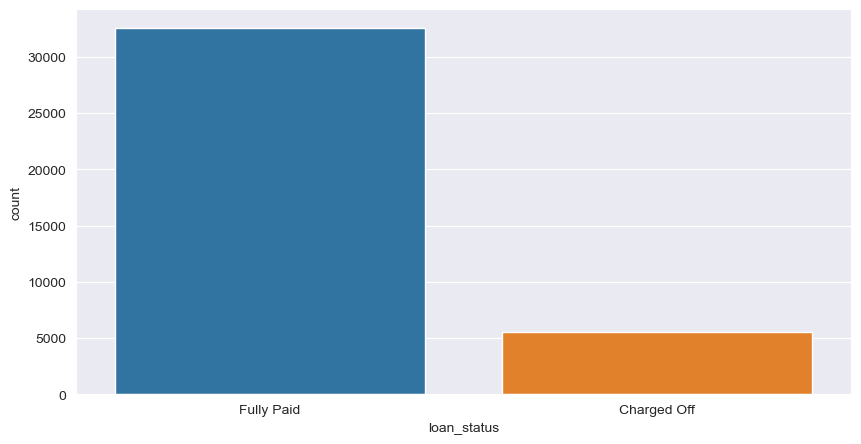

In [1273]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=loan_data_clean.loan_status)
plt.show()

#### Charged Off loans are low in number as compared to Fully Paid Loans

#### Loan Amount

In [1274]:
loan_data_clean.loan_amnt.describe()

count   38191.00
mean    10962.27
std      7266.16
min       500.00
25%      5200.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

#### Distribution of loan Amounts

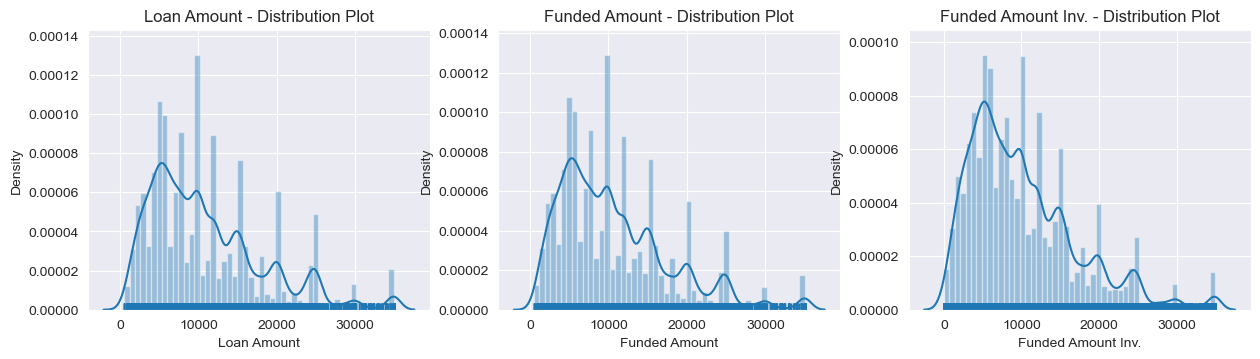

In [1275]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
ax=sns.distplot(loan_data_clean['loan_amnt'],rug=True)
ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


plt.subplot(2,3,2)
ax=sns.distplot(loan_data_clean['funded_amnt'],rug=True)
ax.set(title='Funded Amount - Distribution Plot',xlabel='Funded Amount')


plt.subplot(2, 3, 3)
ax = sns.distplot(loan_data_clean['funded_amnt_inv'],rug = True)
ax.set(title='Funded Amount Inv. - Distribution Plot',xlabel='Funded Amount Inv.')

plt.show()

#### From the above, the distribution of all three looks very similar

#### Purpose of loan

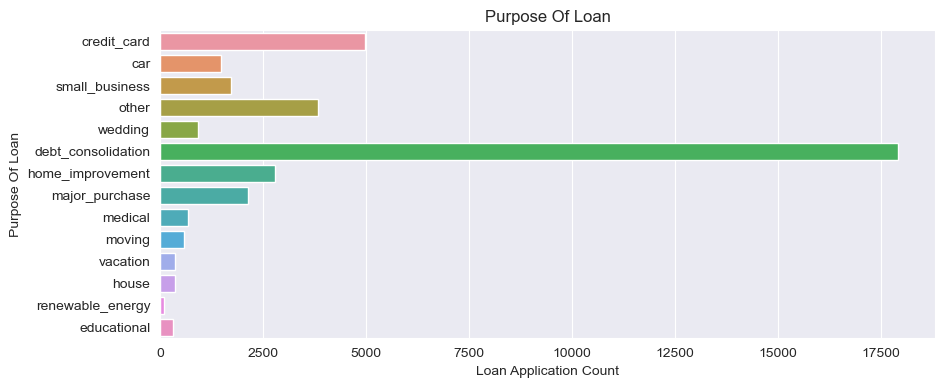

In [1276]:
plt.figure(figsize=(10,4))
ax=sns.countplot(y="purpose",data=loan_data_clean)
ax.set(title='Purpose Of Loan')
ax.set_ylabel('Purpose Of Loan')
ax.set_xlabel('Loan Application Count')
plt.show()

#### the above graph shows that most of the loans were taken for the purpose of debt_consolidation and credit_card payment. The no. of charged off loans is also high for these loans

#### Home Ownership

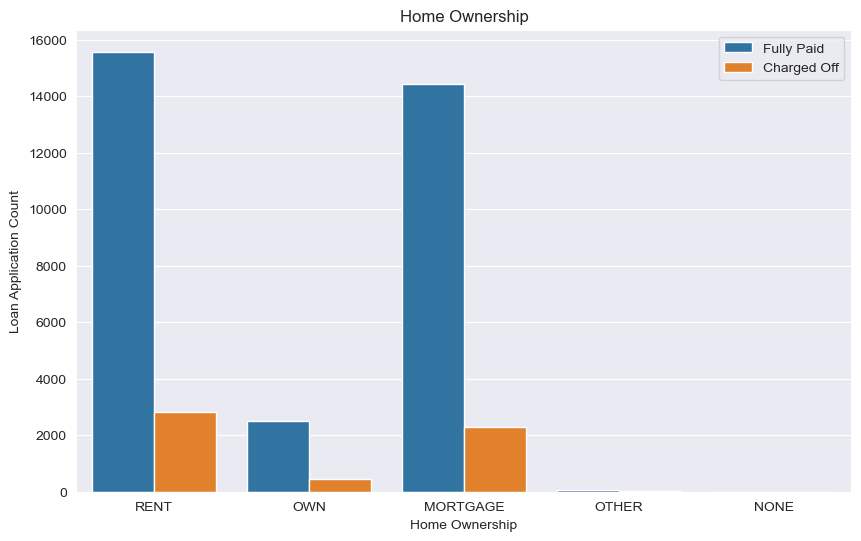

In [1277]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="home_ownership",data=loan_data_clean,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Home Ownership')
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Loan Application Count')
plt.show()

#### The plot shows that most of them live in rented home or have mortgaged their home

#### Interest Rate

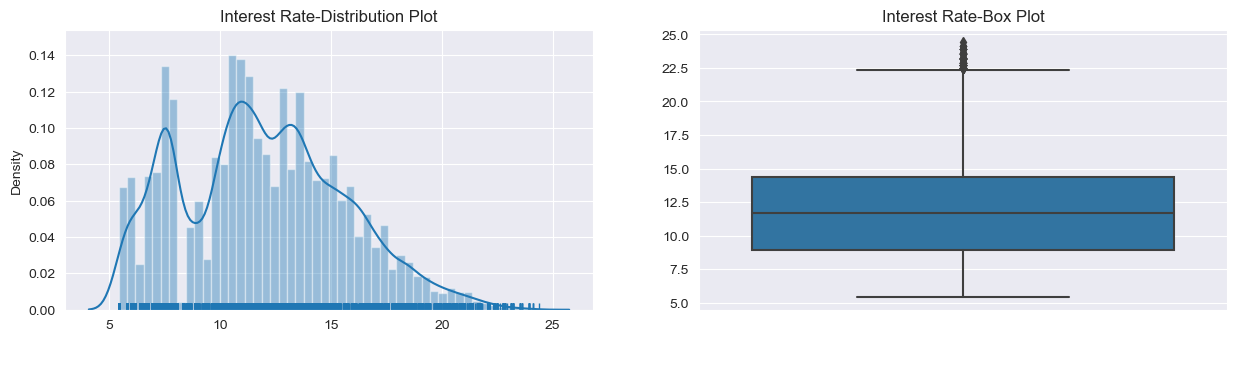

In [1278]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
ax=sns.distplot(loan_data_clean['int_rate'],rug=True)
ax.set(title='Interest Rate-Distribution Plot')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_data_clean['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')

plt.show()

#### most of the interest rate are in the range of 10-15%

#### DTI

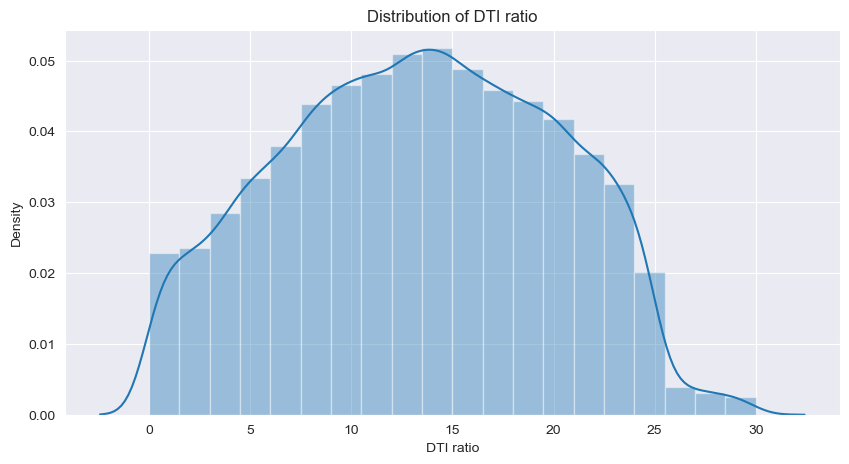

In [1279]:
plt.figure(figsize=(10,5))
sns.distplot(loan_data_clean.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

#### Most of the borrowers have large debt (10-15% dti ratio)

#### Annual Income

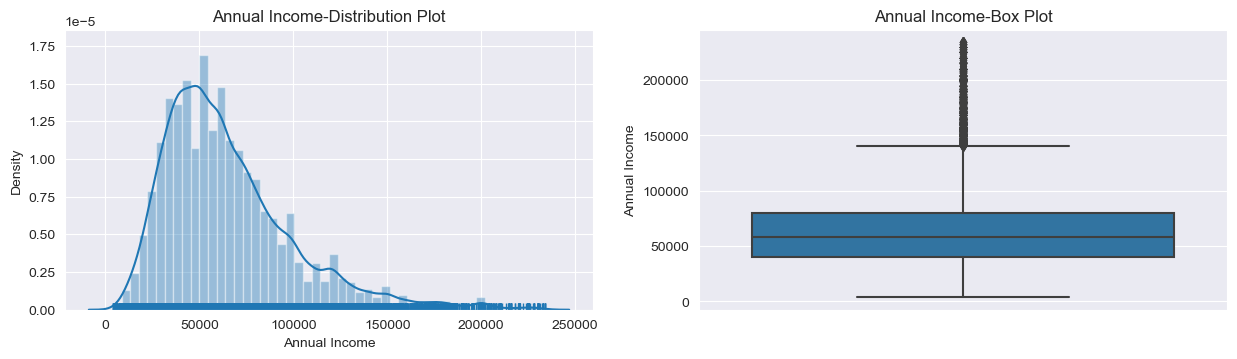

In [1280]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
ax=sns.distplot(loan_data_clean['annual_inc'],rug=True)
ax.set(title='Annual Income-Distribution Plot')
ax.set_xlabel('Annual Income')

plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_data_clean['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income')

plt.show()

In [1281]:
loan_data_clean.annual_inc.describe()

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64

#### most of the annual income is in the range of 25k-75k

#### Loan Term

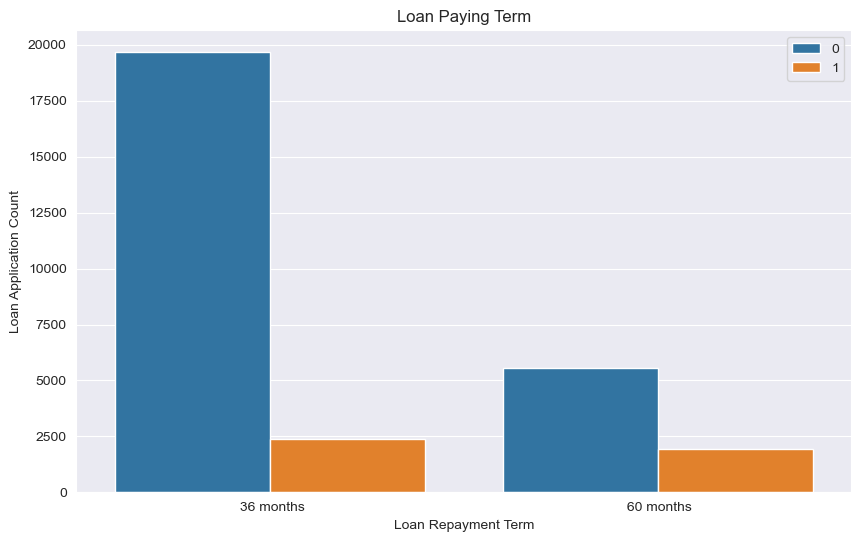

In [1333]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x="term",data=loan_data_clean,hue='loan_status')
ax.set(title='Loan Paying Term')
ax.set_xlabel('Loan Repayment Term')
ax.set_ylabel('Loan Application Count')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### the above plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to ones who had taken for 36 months.

In [1283]:
# Correlation Analysis
loan_data_corr = loan_data_clean[["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "annual_inc", "dti"]].corr()
loan_data_corr

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt             1.00         0.98             0.94      0.30   
funded_amnt           0.98         1.00             0.96      0.30   
funded_amnt_inv       0.94         0.96             1.00      0.30   
int_rate              0.30         0.30             0.30      1.00   
annual_inc            0.42         0.41             0.39      0.07   
dti                   0.07         0.07             0.08      0.11   

                 annual_inc   dti  
loan_amnt              0.42  0.07  
funded_amnt            0.41  0.07  
funded_amnt_inv        0.39  0.08  
int_rate               0.07  0.11  
annual_inc             1.00 -0.11  
dti                   -0.11  1.00

#### loan_amnt, funded_amnt_inv and funded_amnt are strongly correlated. 
#### Positive correlation between annual amount and funded amount .
#### annual income and dti are negatively correlated. 
#### Positive correlation between annual income and employment years

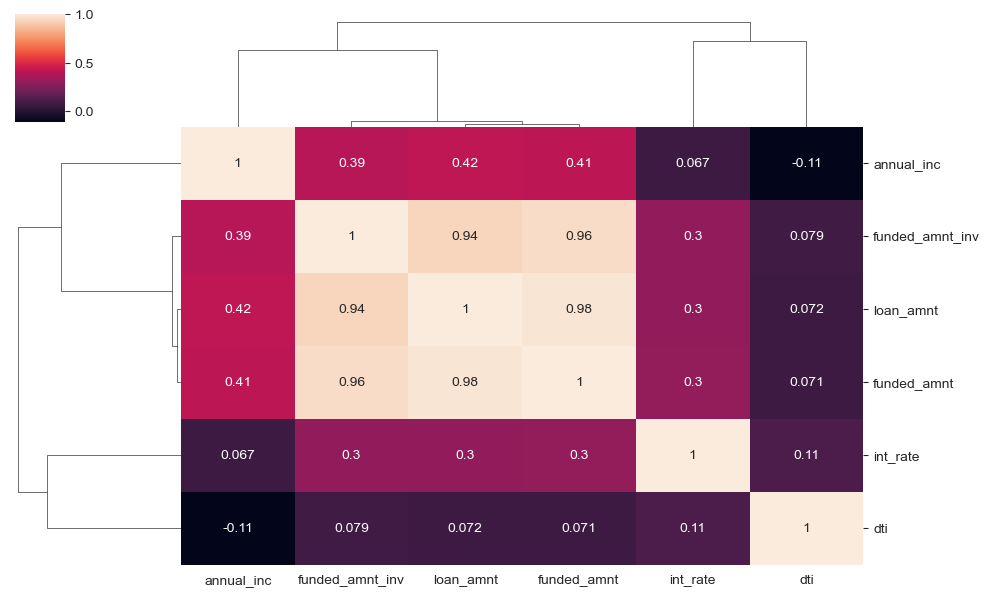

In [1284]:
# Heatmap
sns.clustermap(loan_data_corr,annot=True,figsize=(10,6))
plt.show()

### 4.2 Bivariate Analysis

#### Purpose of Loan vs Charged Off Proportion

In [1285]:
purpose_vs_loan_status = loan_data_clean.groupby(["purpose", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()

purpose_vs_loan_status["Total"] = purpose_vs_loan_status["Charged Off"] + purpose_vs_loan_status["Fully Paid"]

purpose_vs_loan_status["Charged_Off_Proportion"] = purpose_vs_loan_status["Charged Off"] / purpose_vs_loan_status["Total"]


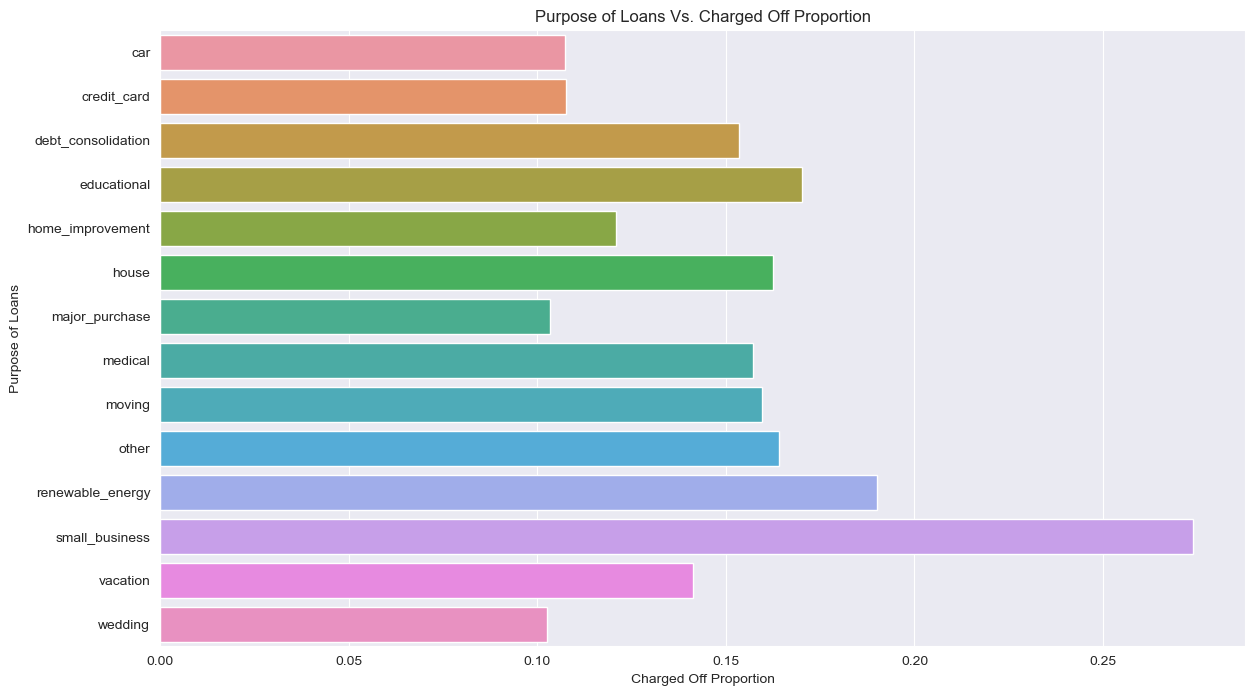

In [1286]:
fig,ax1=plt.subplots(figsize=(14,8))
ax1.set(title='Purpose of Loans Vs. Charged Off Proportion')
ax1=sns.barplot(y='purpose',x='Charged_Off_Proportion',data=purpose_vs_loan_status)
ax1.set_ylabel('Purpose of Loans')
ax1.set_xlabel('Charged Off Proportion')

fig.show()

#### small business applicants have high chance of getting charged off. Also, renewable energy is better than other categories .

#### Annual Income vs Charged Off Proportion

In [1287]:
# creating bins for annual income
loan_data_clean["annual_inc_categories"]=pd.cut(loan_data_clean["annual_inc"],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

In [1288]:
annual_inc_vs_loan_status = loan_data_clean.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

annual_inc_vs_loan_status['Total'] = annual_inc_vs_loan_status['Charged Off'] + annual_inc_vs_loan_status['Fully Paid'] 

annual_inc_vs_loan_status['Charged_Off_Proportion'] = annual_inc_vs_loan_status['Charged Off'] / annual_inc_vs_loan_status['Total']


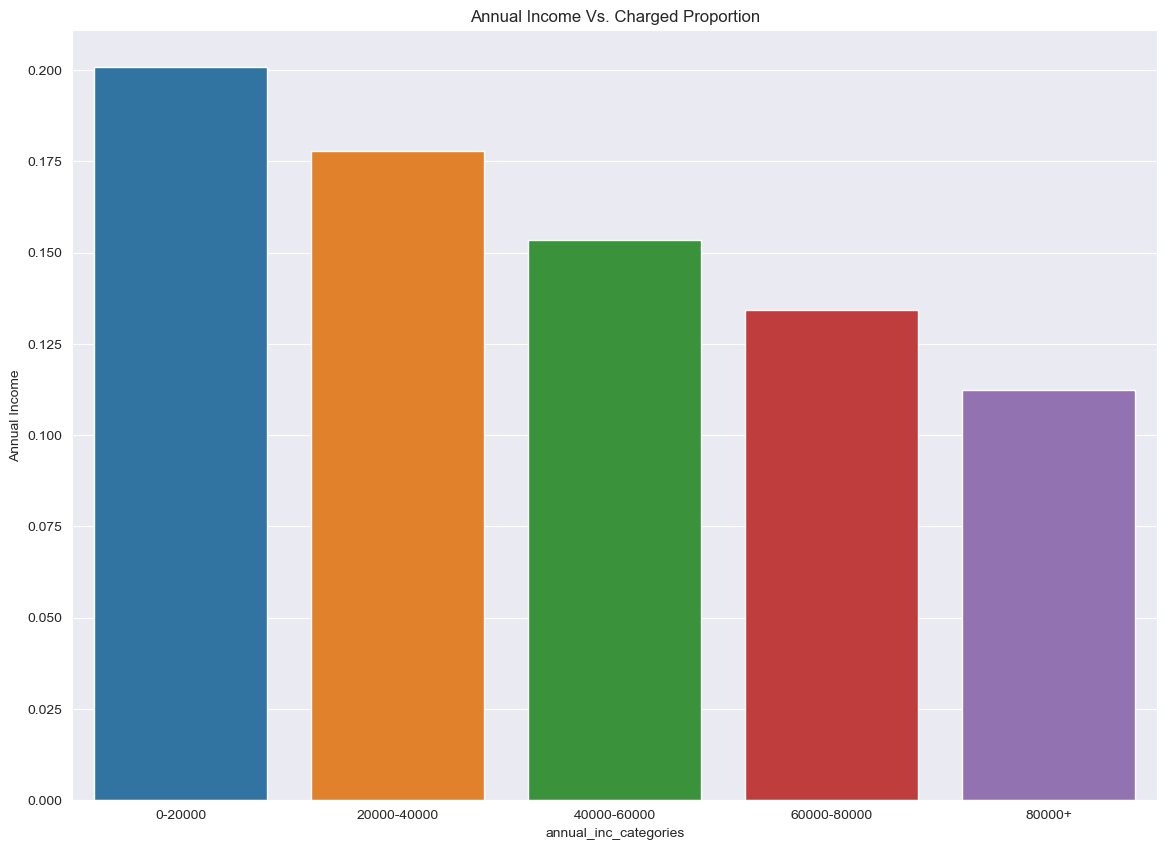

In [1325]:
fig,ax1=plt.subplots(figsize=(14,10))
ax1.set(title='Annual Income Vs. Charged Proportion')
ax1=sns.barplot(x='annual_inc_categories',y='Charged_Off_Proportion',data=annual_inc_vs_loan_status)
ax.set_xlabel('Charged Off Proportion')
ax1.set_ylabel('Annual Income')
fig.show()

#### Annual Income range 0-20k has high chances of charged off. Annual Income range 80k+ have less chances of charged off. Annual income is inversely proportional to Charged off . 

#### Interest Rate vs Charged Off Proportion

In [1290]:
loan_data_clean['interest_rate_categories']=pd.cut(loan_data_clean['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

In [1291]:
interest_vs_loan_status = loan_data_clean.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()

interest_vs_loan_status['Total'] = interest_vs_loan_status['Charged Off'] + interest_vs_loan_status['Fully Paid']

interest_vs_loan_status['Charged_Off_Proportion'] = interest_vs_loan_status['Charged Off']/interest_vs_loan_status['Total']

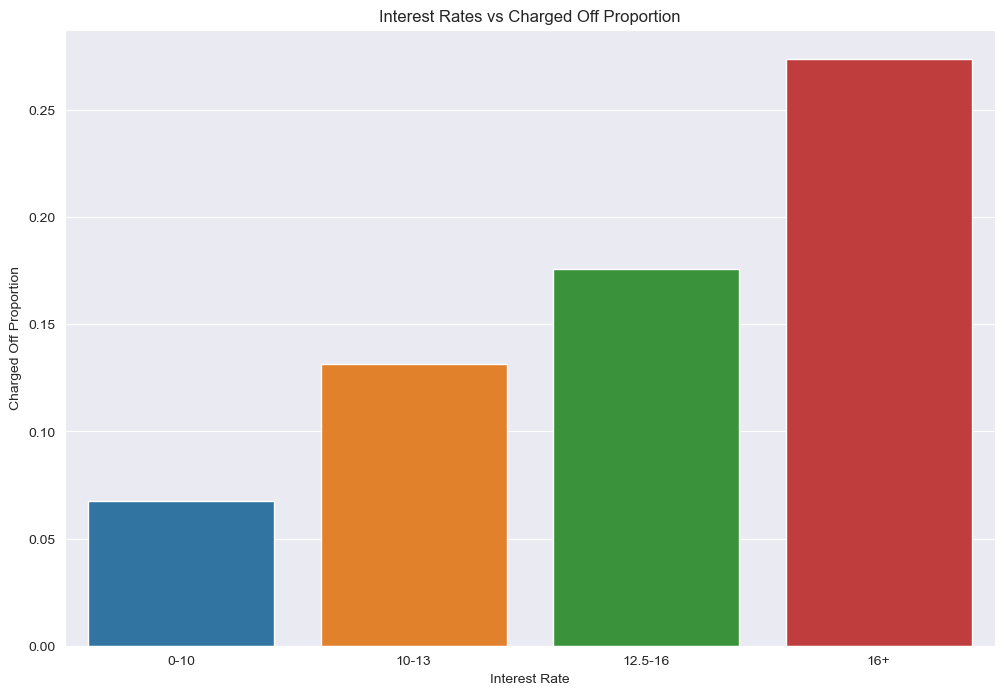

In [1292]:
fig1,ax1=plt.subplots(figsize=(12,8))
ax1.set(title='Interest Rates vs Charged Off Proportion')
ax1=sns.barplot(x='interest_rate_categories',y='Charged_Off_Proportion',data=interest_vs_loan_status)
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Charged Off Proportion')

fig1.show()

#### Interest Rates which are less than 10% have very less chances of charged off. Charged Off Proportion increases with higher interest rates

#### Address vs Charged Off Proportion

In [1293]:
state_vs_loan_status = loan_data_clean.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan_status['Total'] = state_vs_loan_status['Charged Off'] + state_vs_loan_status['Fully Paid']
state_vs_loan_status['Charged_Off_Proportion'] = state_vs_loan_status['Charged Off']/state_vs_loan_status['Total']

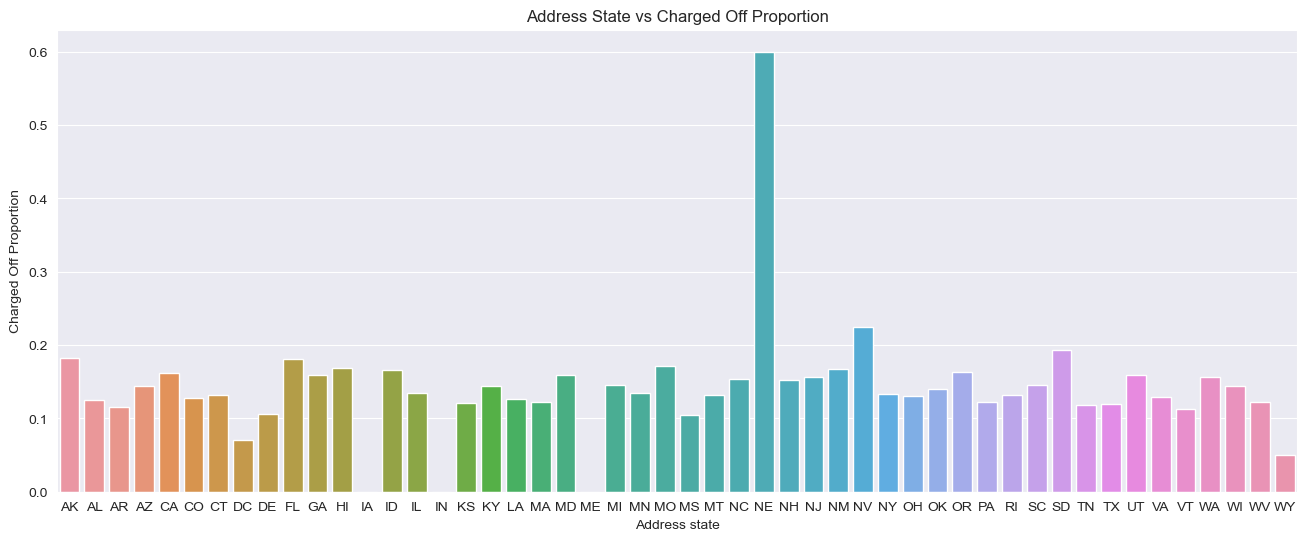

In [1294]:
fig,ax1=plt.subplots(figsize=(16,6))
ax1.set(title='Address State vs Charged Off Proportion')
ax1=sns.barplot(x='addr_state',y='Charged_Off_Proportion',data=state_vs_loan_status)
ax1.set_xlabel('Address state')
ax1.set_ylabel('Charged Off Proportion')
fig.show()

In [1295]:
print("No of applications for NE state ", (loan_data_clean["addr_state"] == "NE").sum())
print("No of applications for NV state ", (loan_data_clean["addr_state"] == "NV").sum())
print("No of applications for CA state ", (loan_data_clean["addr_state"] == "CA").sum())
print("No of applications for FL state ", (loan_data_clean["addr_state"] == "FL").sum())

No of applications for NE state  5
No of applications for NV state  475
No of applications for CA state  6882
No of applications for FL state  2749


#### States NE has very high chances of charged off but number of applications are too low to make any decisions. States NV,CA and FL states shows good number of charged offs in good number of applications.

#### Pub_Bankruptcy vs Charged Off Proportion

In [1296]:
bankruptcies_vs_loan_status = loan_data_clean.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()

bankruptcies_vs_loan_status['Total'] = bankruptcies_vs_loan_status['Charged Off'] + bankruptcies_vs_loan_status['Fully Paid']

bankruptcies_vs_loan_status['Charged_Off_Proportion'] = bankruptcies_vs_loan_status['Charged Off']/bankruptcies_vs_loan_status['Total']

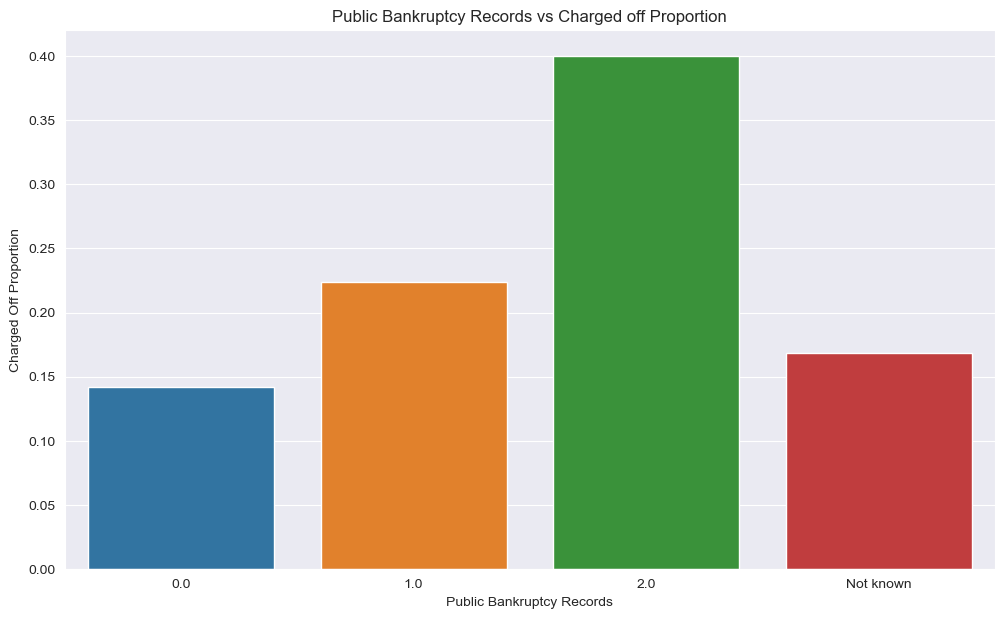

In [1297]:
fig,ax1=plt.subplots(figsize=(12,7))
ax1.set_title('Public Bankruptcy Records vs Charged off Proportion')
ax1=sns.barplot(x='pub_rec_bankruptcies',y='Charged_Off_Proportion',data=bankruptcies_vs_loan_status)
ax1.set_xlabel('Public Bankruptcy Records')
ax1.set_ylabel('Charged Off Proportion')
fig.show()

#### Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies. pub_rec_bankruptcies count 2 has even higher charged off proportion. Those who have defaulted before have more chances of defaulting in future as well.

#### Purpose of Loan vs Loan Amount

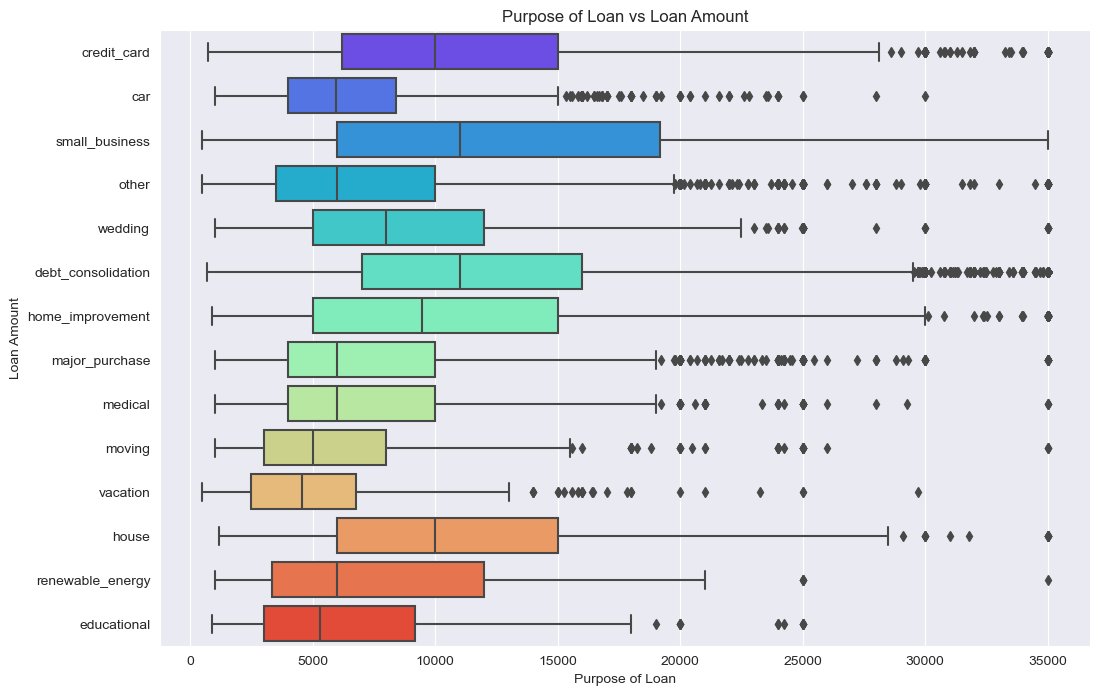

In [1298]:
plt.figure(figsize=(12,8))
ax=sns.boxplot(y='purpose',x='loan_amnt',data=loan_data_clean,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount')
ax.set_xlabel('Purpose of Loan')
ax.set_ylabel('Loan Amount')
plt.show()

#### Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes. Debt consolidation is second and Credit card comes 3rd.

#### Term of Loan vs Interest Rate

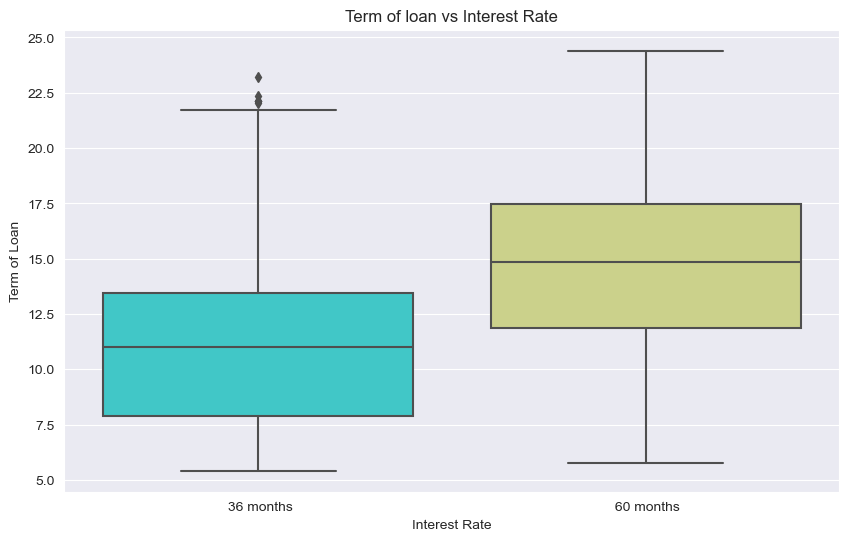

In [1299]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(y='int_rate',x='term',data=loan_data_clean,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Term of Loan')
plt.show()

#### The avearge intrest rate is higher for 60 months loan term and most of the loans issued for longer term had higher interest rates of repayment

#### Purpose vs Interest Rate

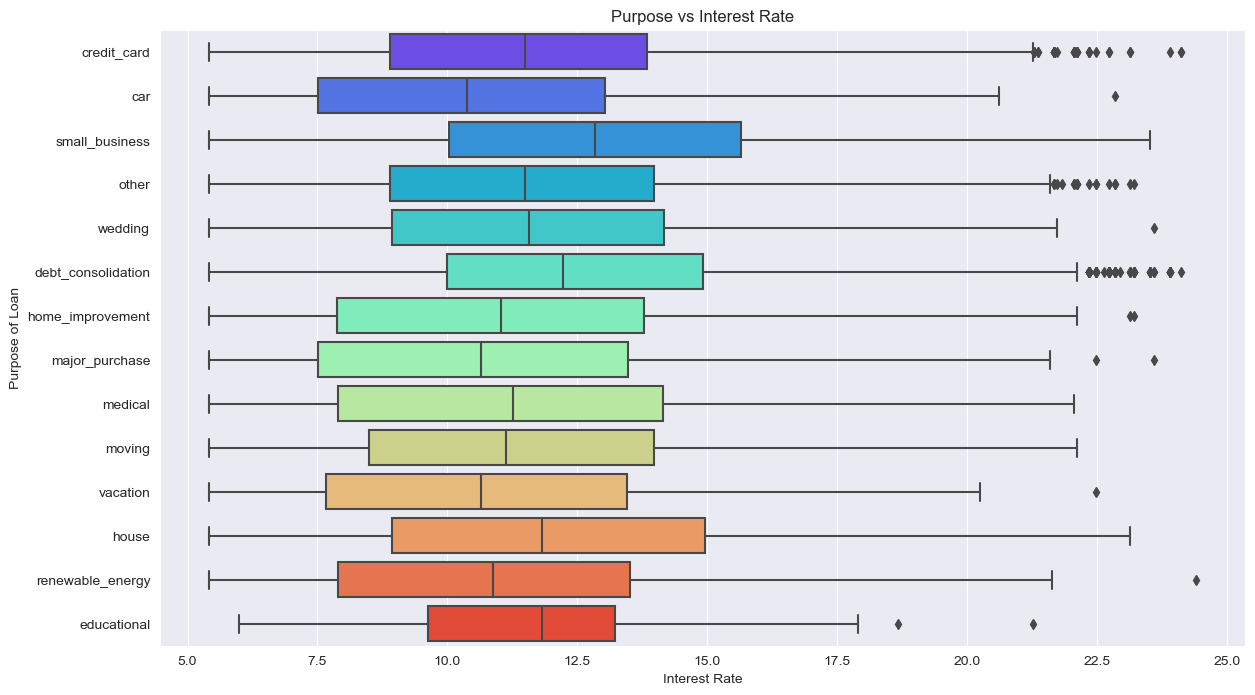

In [1300]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate', y='purpose', data =loan_data_clean,palette='rainbow')
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

#### The average interest rate is higher for small businesses. Debt consolidation is second . Loans taken for small businesses had to repay the loan with more interest rate as compared to others.

#### Loan Amount vs Interest Rate

In [1301]:
#Creating categories for loan amounts 
loan_data_clean['loan_amnt_categories']=pd.cut(loan_data_clean['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

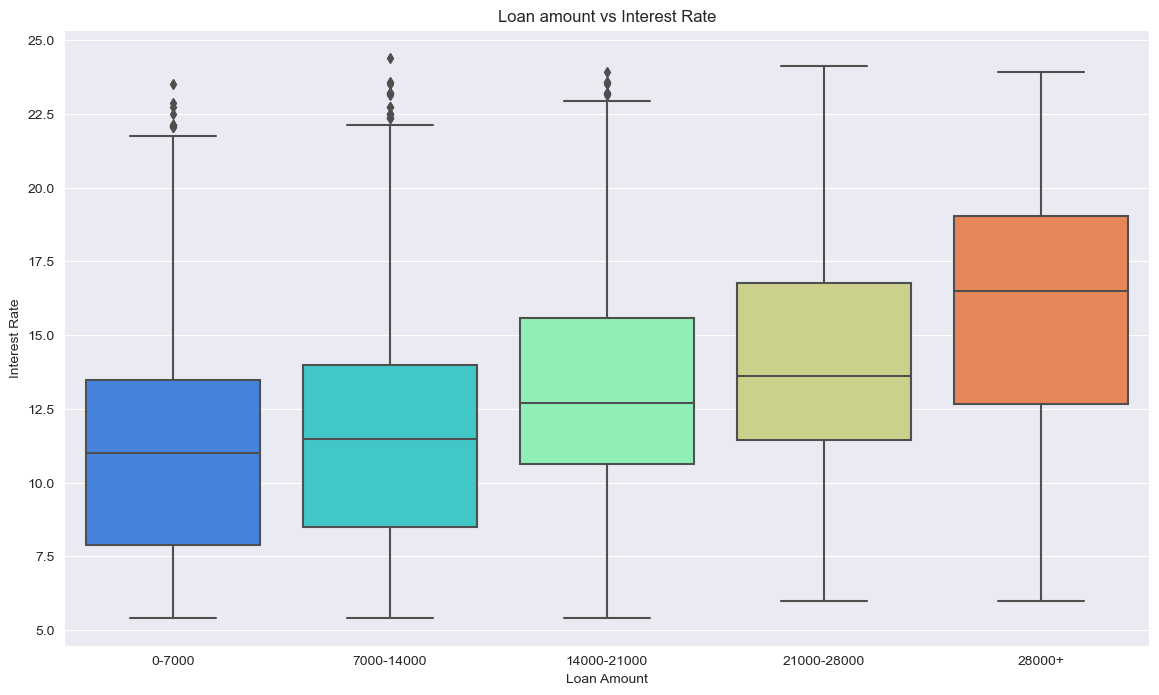

In [1302]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_categories', data =loan_data_clean,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

#### Interest Rate is increasing with loan Amount. When the loan amount is more, it's probable thats its taken for a longer term and that's why higher interest rate.

### 4.3 Segmented Analysis

In [1303]:
#### Lets try analysing the purpose of loan wrt loan status

In [1304]:
loan_data_clean.loan_status.value_counts()

Fully Paid     32607
Charged Off     5584
Name: loan_status, dtype: int64

In [1305]:
loan_data_clean.purpose.value_counts()

debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: purpose, dtype: int64

In [1306]:
# we will convert the loan_status to either 0 or 1 so that it can be used for plotting wrt purpose of loan
loan_data_clean["loan_status"] = loan_data_clean.loan_status.apply(lambda x: 0 if x == "Fully Paid" else 1)
loan_data_clean.loan_status.dtype

dtype('int64')

In [1307]:
# We will focus on the imp columns only in this analysis - loan_amnt, annual_inc, issue_year, int_rate, loan_status

loan_data_multivariate = loan_data_clean[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()

loan_data_multivariate.head(2)

loan_amnt  annual_inc  issue_year  int_rate  loan_status
0       5000    24000.00        2011     10.65            0
1       2500    30000.00        2011     15.27            1

In [1308]:
loan_data_multivariate['loan_amnt'] = np.log10(loan_data_multivariate['loan_amnt'])
loan_data_multivariate['annual_inc'] = np.log10(loan_data_multivariate['annual_inc'])
loan_data_multivariate['int_rate'] = np.log10(loan_data_multivariate['int_rate'])

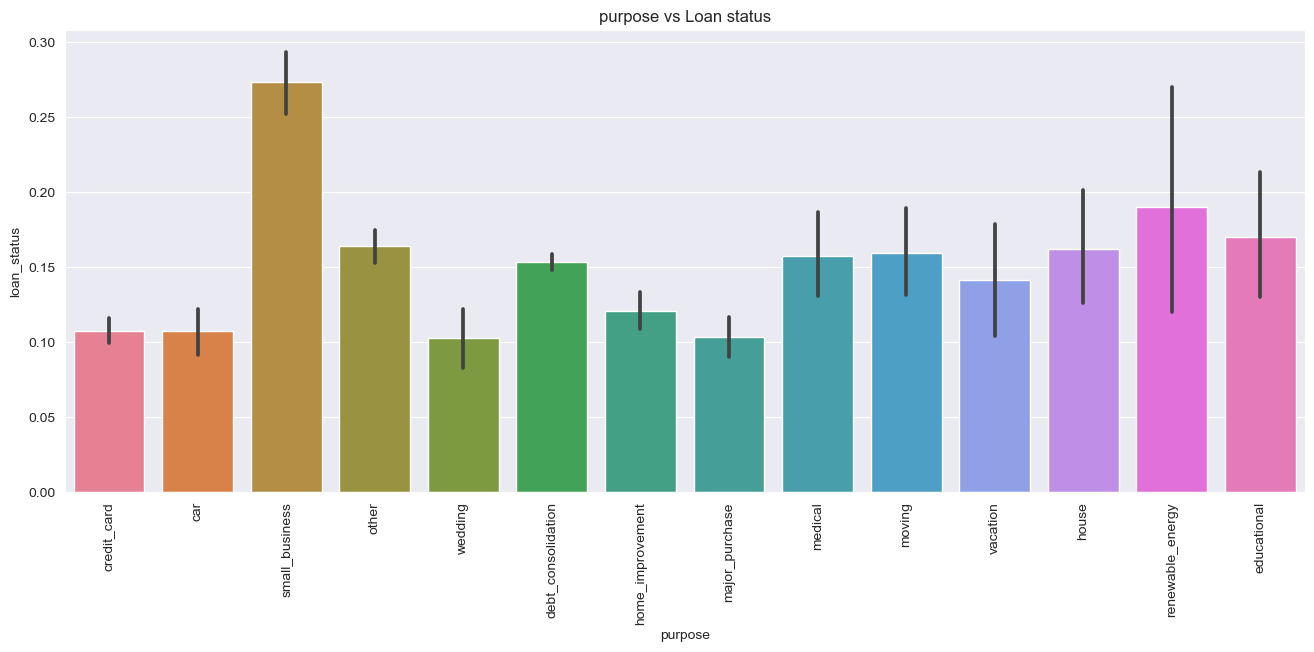

In [1309]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title('purpose vs Loan status')
sns.barplot(x='purpose', y='loan_status', data=loan_data_clean, palette = "husl")
plt.show()

#### it is evident that the small businesses have the most loan defaults followed by renewable energy and education

In [1310]:
# Lets check the no of loans for the above ones for verification

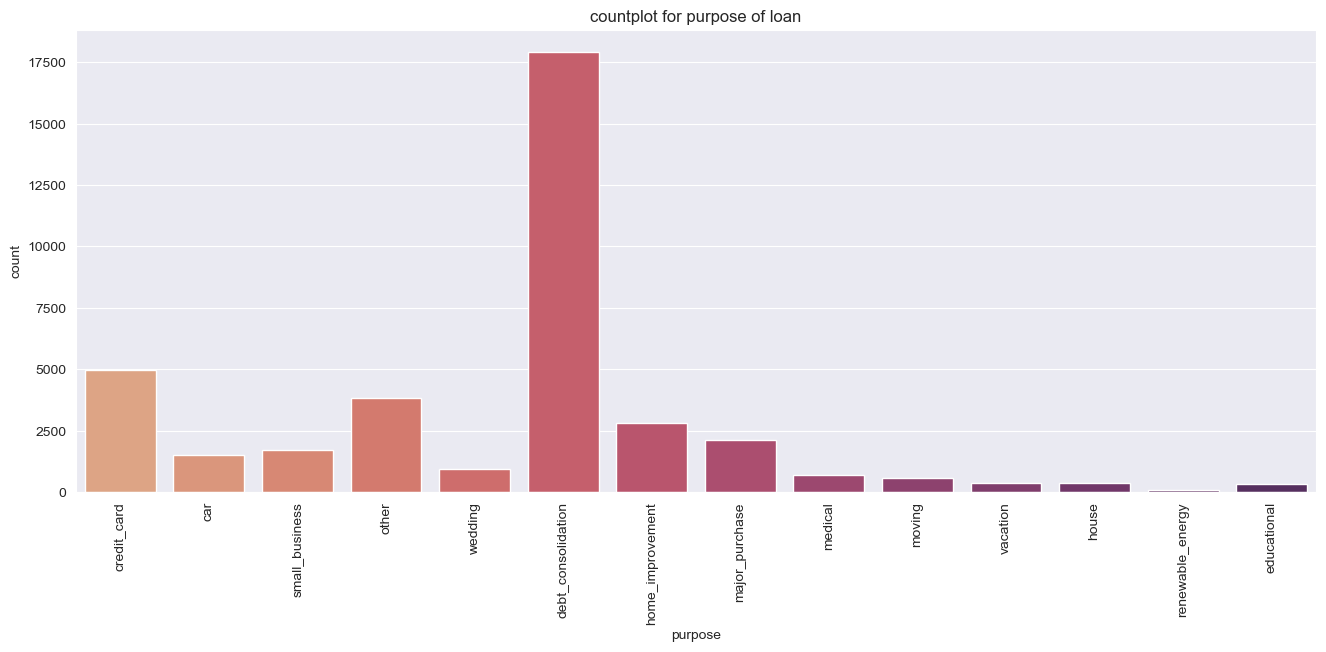

In [1311]:
def purpose_count_plot():
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=90)

    title = "countplot for purpose of loan"
    plt.title(title)
    sns.countplot(x="purpose", data=loan_data_clean, palette = "flare")
    plt.show()
    
purpose_count_plot()

#### the small business has more data points, followd by education and renewable energy

In [1312]:
# Top 5 purposes of loans are credit card, small business, debt consolidation, home_improvement and major_purchase

In [1313]:
filtered_purposes = ["credit_card", "small_business", "debt_consolidation", "home_improvement", "major_purchase"]
loan_data_clean = loan_data_clean[loan_data_clean.purpose.isin(filtered_purposes)]
loan_data_clean.purpose.value_counts()

debt_consolidation    17917
credit_card            4987
home_improvement       2797
major_purchase         2129
small_business         1723
Name: purpose, dtype: int64

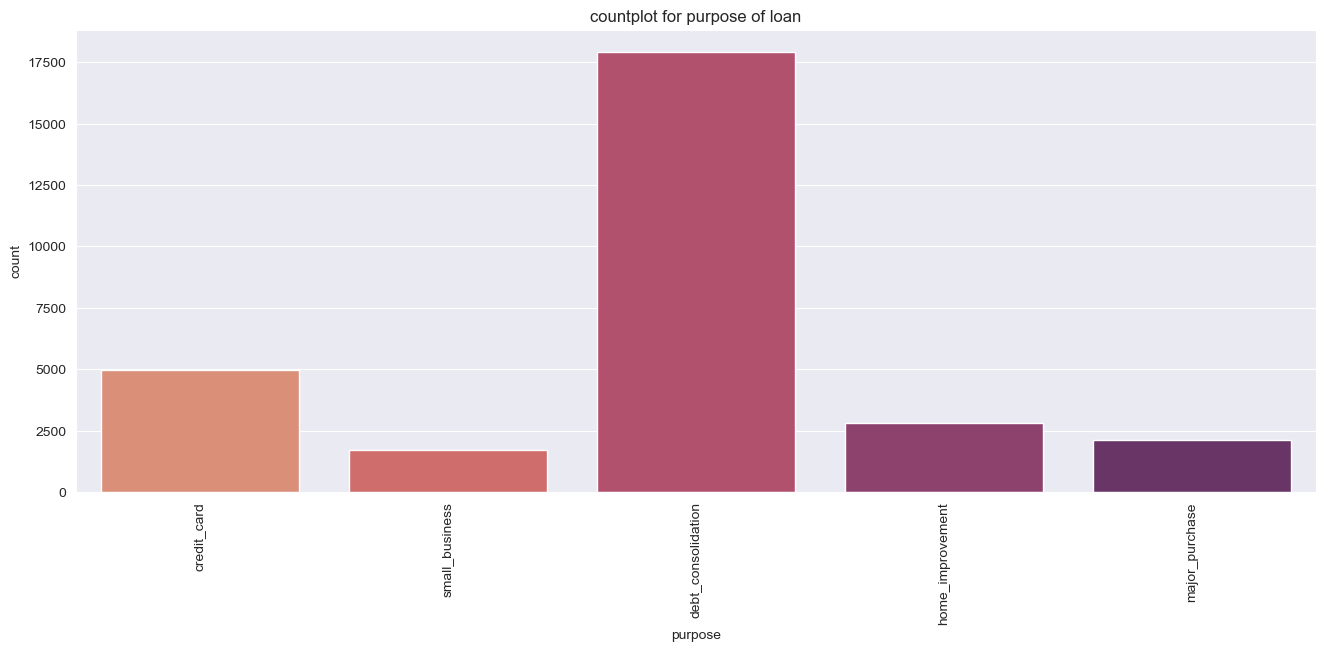

In [1314]:
purpose_count_plot()

#### Lets keep purpose of the loan as constant & analyse loan status

In [1315]:
def cat_segmented_plot(column):
    plt.figure(figsize=(16, 6))
    plt.xticks(rotation=90)
    title = "barplot for " + column
    plt.title(title)
    sns.barplot(x=str(column), y='loan_status', hue='purpose', data=loan_data_clean, palette = "husl")
    plt.show()  

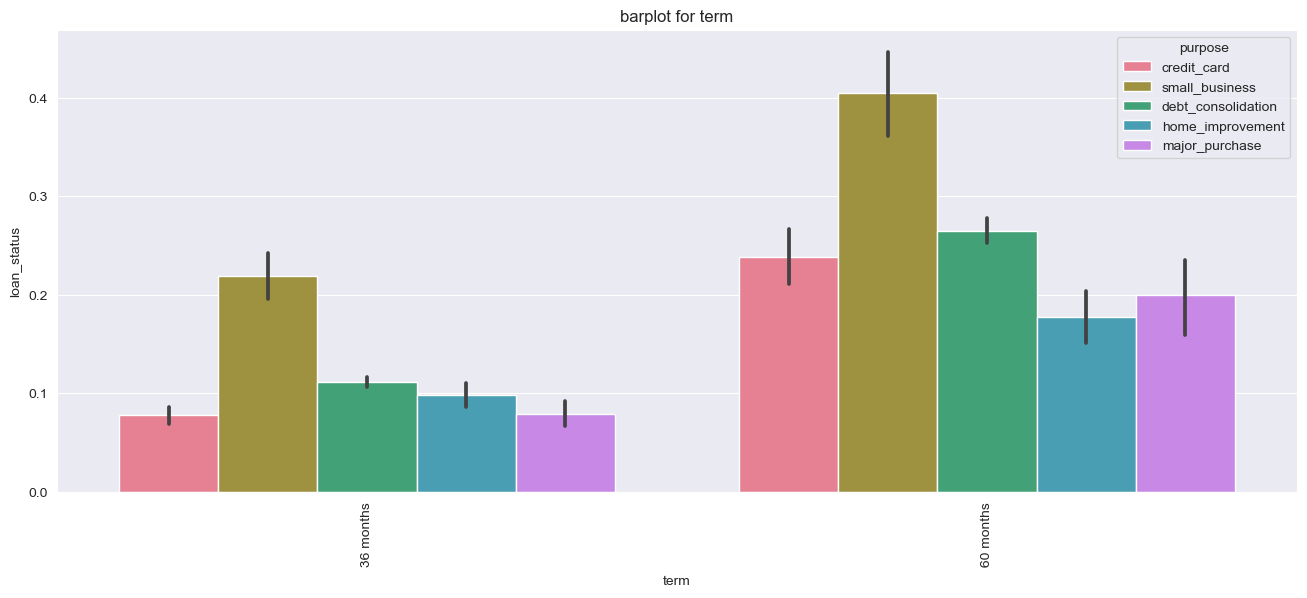

In [1316]:
cat_segmented_plot("term")

#### small business has the most loan defaults followed by debt consolidation for both terms

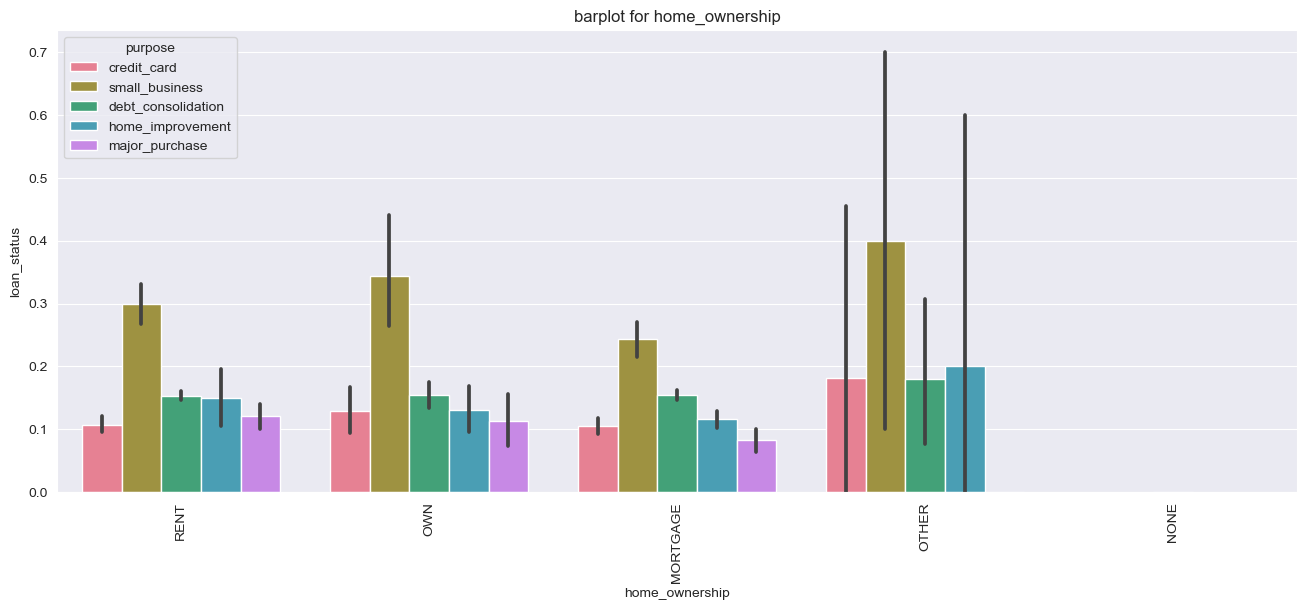

In [1317]:
cat_segmented_plot("home_ownership")

#### small business has the most loan defaults

In [1318]:
# for loan amount, we will have to first categorise the loan amounts into categories like low, medium and high

def categorise_loan_amounts(amount):
    if amount < 5000:
        return "low"
    elif amount >= 5000 and amount < 15000:
        return "medium"
    else:
        return "high"
    
loan_data_clean["loan_amnt"] = loan_data_clean.loan_amnt.apply(lambda x: categorise_loan_amounts(x))

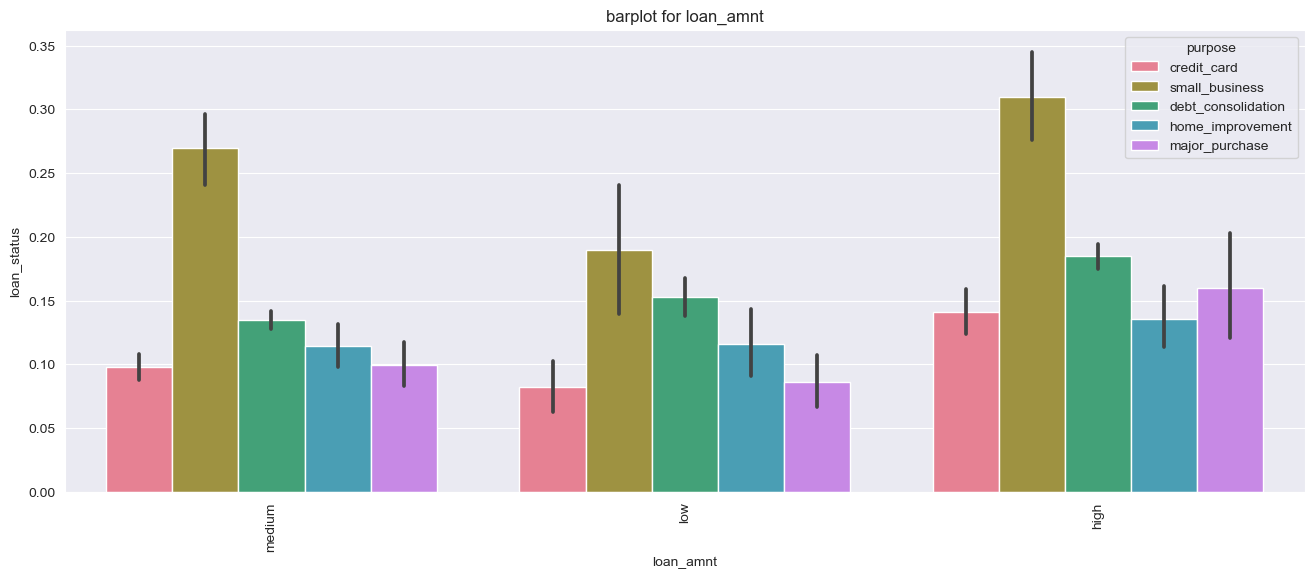

In [1319]:
cat_segmented_plot("loan_amnt")

#### well for all the three categories , loan amount remains the same across the purposes

In [1320]:
# for interest rate, we will have to first categorise the interest rate into categories like low, medium and high

def categorise_interest_rate(value):
    if value < 10:
        return "low"
    elif value >= 10 and value < 15:
        return "medium"
    else:
        return "high"
    
loan_data_clean["int_rate"] = loan_data_clean.int_rate.apply(lambda x: categorise_interest_rate(x))

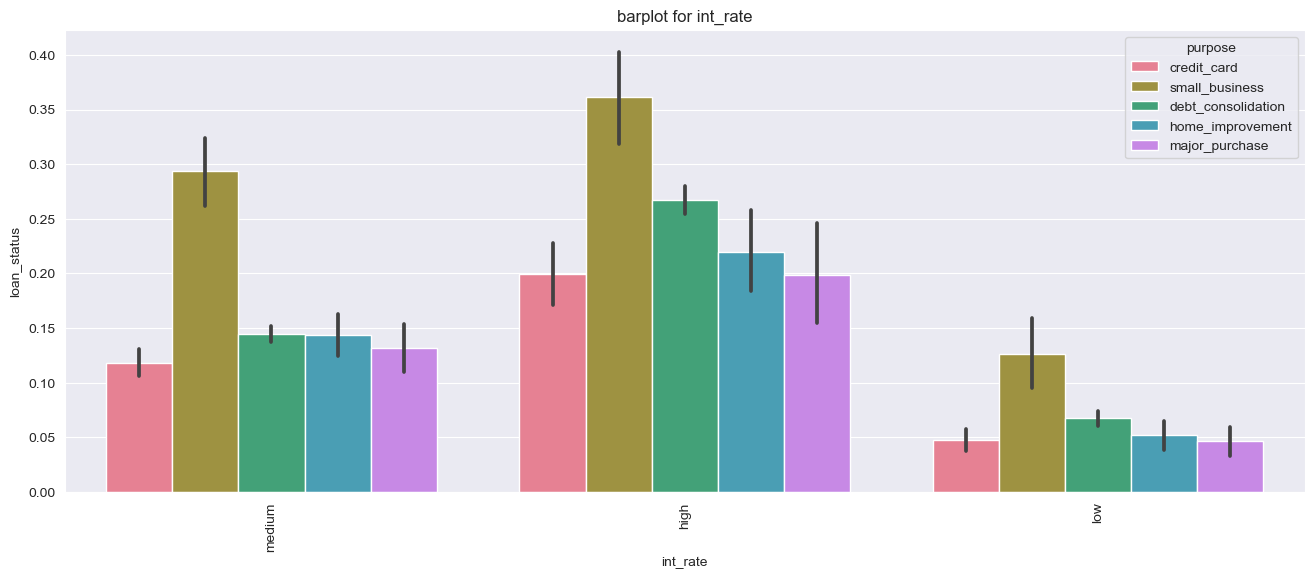

In [1321]:
cat_segmented_plot("int_rate")

#### interest rate is almost same for loan purposes 

In [1322]:
# for annual income, we will have to first categorise the annual income into categories like low, medium and high

def categorise_annual_income(value):
    if value <= 50000:
        return "low"
    elif value > 50000 and value <= 100000:
        return "medium"
    else:
        return "high"
    
loan_data_clean["annual_inc"] = loan_data_clean.annual_inc.apply(lambda x: categorise_annual_income(x))

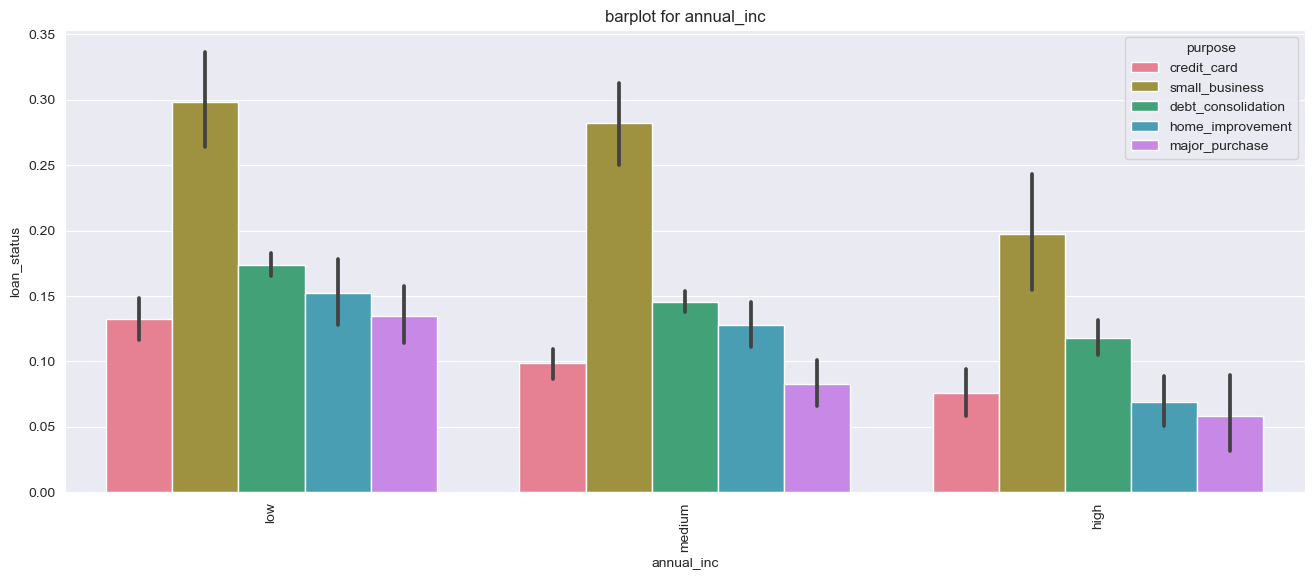

In [1323]:
cat_segmented_plot("annual_inc")

#### annual income is also the same across purposes

### 4.4 Multivariate Analysis

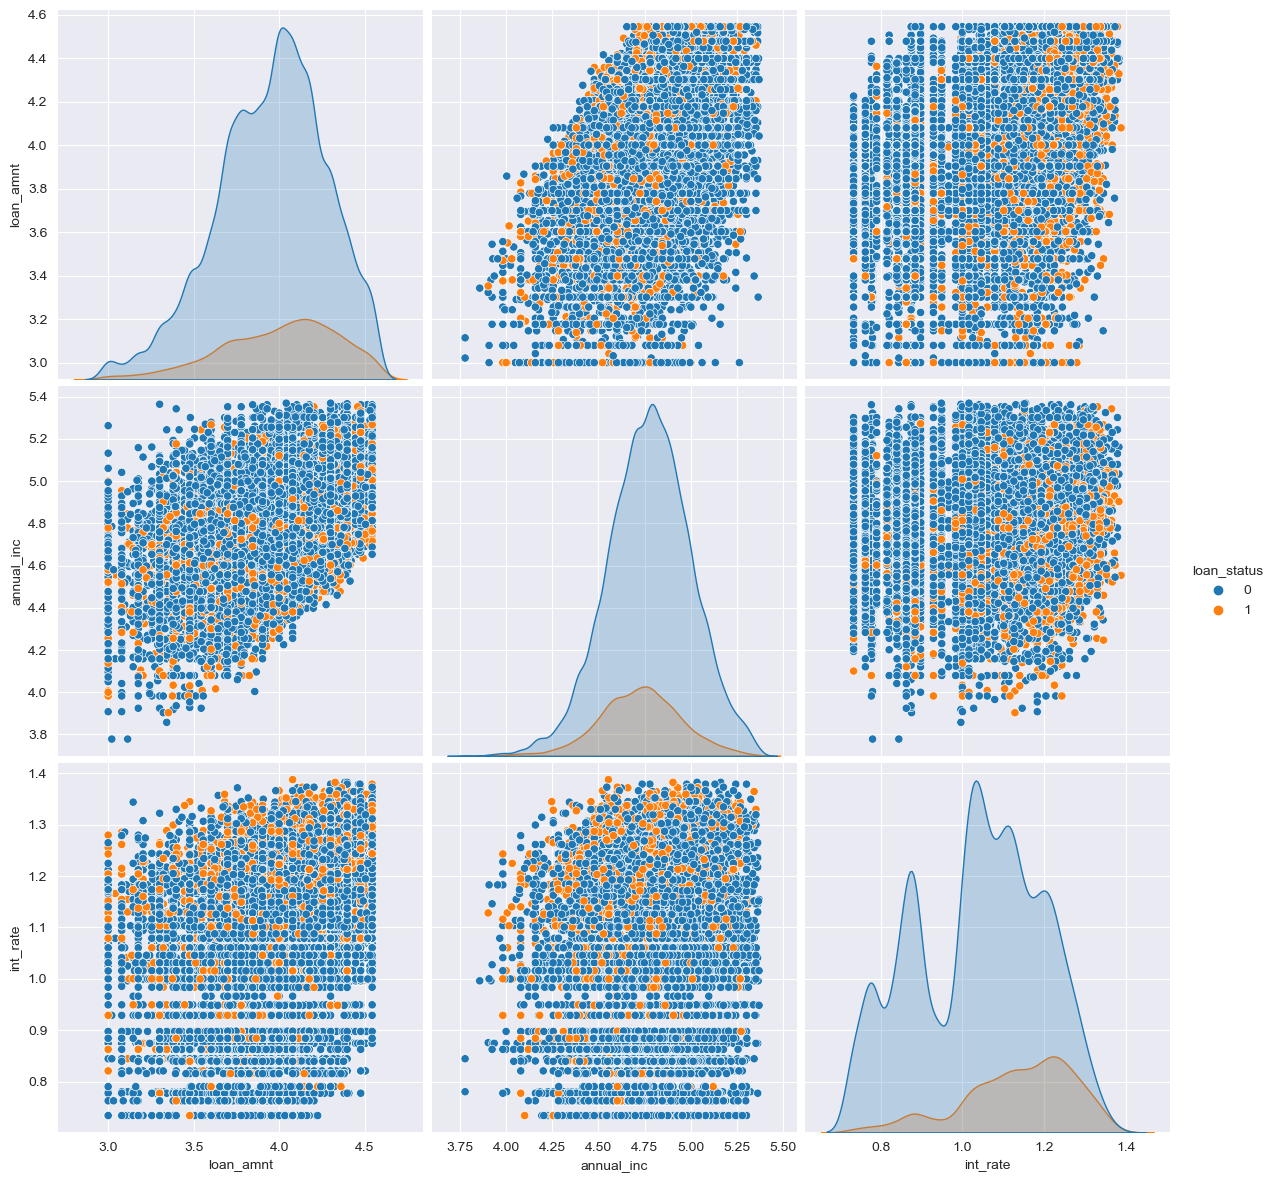

In [1324]:
# We will plot a pairplot for only important columns to find the relationship between them. These columns are issue_year, loan_amnt, annual_inc & int_rate
sns.pairplot(loan_data_multivariate[loan_data_multivariate["issue_year"] == 2011], 
             vars = ["loan_amnt", "annual_inc", "int_rate"],
             hue = 'loan_status',
             diag_kind = 'kde', 
             size = 4);

#### from the above if we see, higher is the charged off ratio for higher interest rate. Also higher the annual income , higher the loan amount. Interest rate is increasing with loan amount and hence an increase in charged off

### 5. Inferences

#### Univariate Analysis

1. Majority of the borrowers live on rent or have mortgaged their property.
2. Most of the loans were taken for the purpose of debt consolidation and credit card payment. The no. of charged off loans is also high for these loans.
3. The interest rate mostly lies in the range of 10-15%.
4. Most of the borrowers have large debt (10-15% dti ratio)
5. Most of the annual income is in the range of 25k-75k.
6. Those who had taken loan to repay in 60 months had more % of number of applicants getting charged off as compared to ones who had taken for 36 months.

#### Bivariate Analysis

1. Small business applicants have high chance of getting charged off. Also, renewable energy is better than other categories .
2. Annual Income range 0-20k has high chances of charged off. Annual Income range 80k+ have less chances of charged off. Annual income is inversely proportional to Charged off . 
3. Interest Rates which are less than 10% have very less chances of charged off. Charged Off Proportion increases with higher interest rates
4. Those who have defaulted before have more chances of defaulting in future as well.
5. The average interest rate is higher for 60 months loan term and most of the loans issued for longer term had higher interest rates of repayment.
6. The average interest rate is higher for small businesses. Debt consolidation is second . Loans taken for small businesses had to repay the loan with more interest rate as compared to others.
7. Interest Rate is increasing with loan Amount. When the loan amount is more, it's probable thats its taken for a longer term and that's why higher interest rate.
8. States NE has very high chances of charged off but number of applications are too low to make any decisions. States NV,CA and FL states shows good number of charged offs in good number of applications.
9. Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes. Debt consolidation is second and Credit card comes 3rd.

#### Segmented Analysis

1. Small businesses, renewable energy and education sectors have the most loan defaults.

#### MultiVariate Analysis

1. Higher is the charged off ratio for higher interest rate. 
2. Higher the annual income , higher the loan amount. 
3. Interest rate is increasing with loan amount and hence an increase in charged off.

### Outcome

There is a more probability of a loan application defaulting when :
     
- Applicants whose home ownership is mortgage and have rented their home
- Applications where the purpose of loan is debt consolidation & credit card payments
- Applicants from small business , education and renewable energy
- Applicants who have debt to income ratio as 10-15% with an annual income of 25k-35k
- Applicants who have defaulted before have high chances of defaulting again
- Applicants who have an annual income range of 0-20k
- Applicants who have high loan amount thus resulting in higher interest rate and higher increase in charged off as well
- Applicants from NV, CA and FL states have good number of charged off applications
- Applicants repaying loan in 60 months term 